# Statistical Analysis of the dataset train.txt




Statistics for train.txt dataset:

Minimum label: 0.0
Maximum label: 138.4
Mean label: 15.5454
Median label 8.0
Standard deviation of label: 15.855781198658804


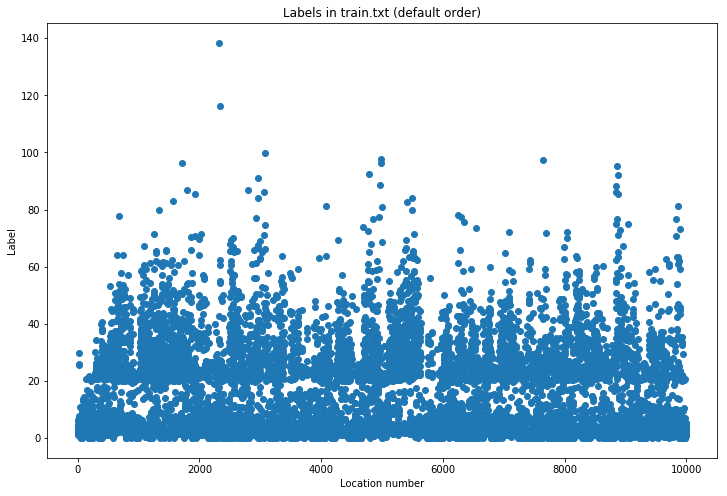

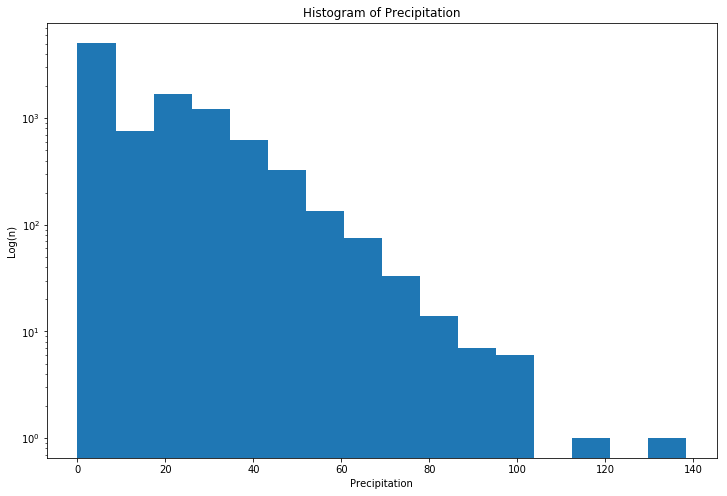

In [41]:
from radarplot.CIKM import CIKM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pretty display for notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

N = 10000
cikm = CIKM('../data/train.txt', '../data/train.index')
idlabels = [n for n in cikm.getIdLabelRange(0, N, sorted=False, reversed=False)]
mapids = [n[0] for n in idlabels]
labels = [n[1] for n in idlabels]
data = pd.DataFrame(labels, mapids, ['label'])

# Minimum label of the data
minimum_label = data.min()

# Maximum label of the data
maximum_label = data.max()

# Mean label of the data
mean_label = data.mean()

# Median label of the data
median_label = data.median()

# Standard deviation of prices of the data
std_label = data.std()

# Show the calculated statistics
print("Statistics for train.txt dataset:\n")
print("Minimum label: {}".format(float(minimum_label)))
print("Maximum label: {}".format(float(maximum_label)))
print("Mean label: {}".format(float(mean_label)))
print("Median label {}".format(float(median_label)))
print("Standard deviation of label: {}".format(float(std_label)))

plt.title('Labels in train.txt (default order)')
plt.xlabel('Location number')
plt.ylabel('Label')
plt.scatter(np.arange(N), labels)
plt.show()


# the histogram of the data
plt.title(r'Histogram of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Log(n)')
plt.hist(data['label'], bins=16, log=True)
plt.show()
